# Projeto de ICD - Dota 2

#### Alunos:
    Gabriel Henrique
    Matheus Vargas
    Raydan Gaspar

1. Definir Tema e grupo. (2pts) ✔️
2. Discussão com Monitores. (3pts) ✔️
3. Relatório Final. Entregue um relatório sobre os resultados que você levantou para responder às suas perguntas. Sua análise dos dados devem apresentar:
    * Uma caracterização (análise exploratória) inicial dos dados (2pts)
    * Pelo menos, dois testes de hipótese/intervalos de confiança (2pts)
        * Os ICs podem ser apresentados nos resultados de regressão e classificação abaixo.
        * Os testes de hipótese também podem ser utilizados abaixo para comparar modelos.
    * Pelo menos uma regressão (3pts)
    * Pelo menos um algoritmo de aprendizado/classificação (3pts)
4. No seu relatório, você deve apresentar pelo menos os seguintes pontos:
 * Introdução com Motivação e Pergunta de Pesquisa
 * Metodologia
 * Descreva sua base
 * Quais métodos e modelos foram utilizados. Justifique os mesmos.
5. Resultados. Sugiro separar em
 * Caracterização (análise exploratória)
     * Testes de hipótese podem vir aqui.
 * Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)
6. Conclusões
 * Responda sua pergunta pelo menos de forma evidencial.
7. Vídeo no Youtube 5 minutos. Pode ser um vídeo só dos slides!! Com as falas, claro. 5pts.

# Introdução

![](img/dota_logo.png)

# Tema

Dota 2 é um jogo eletrônico do gênero Multiplayer Online Battle Arena (MOBA, "arena de batalha multijogador online"), também conhecido como Action Real-Time Strategy (ARTS, "estratégia de ação em tempo real") onde o jogador controla um personagem em uma batalha entre dois times, cujo objetivo é derrotar a equipe adversária e, para isso, é, indispensavelmente, necessário destruir o Ancestral (Ancient), que, por sua vez, se localiza no centro da base inimiga. Cada base é defendida por torres e ondas de unidades (chamadas de creeps) que percorrem os caminhos principais do mapa (chamadas de trilhas, ou lanes) que levam à suas bases. Existem 3 trilhas no mapa do jogo, que por convenção são chamadas de trilha de cima (Top, atravessa a parte de cima do mapa), trilha do meio (Mid ou Middle, caminho que atravessa o centro do mapa) e trilha de baixo (Bot ou Bottom, caminho que atravessa a parte de baixo do mapa). 

Na imagem abaixo podemos ver o minimapa do Dota2 e ao lado um diagrama representando o layout de um jogo do gênero MOBA, onde os pontos roxos e rosas representam as torres de cada time, com exceção do maior ponto localizado nos cantos da imagem dentro de cada base, que representa o Ancient.

| ![](img/minimaps.png)|
|:--:| 
| **Figura 1**: Minimapa do Dota 2 (esquerda) e layout padrão de jogos MOBA (direita) |


## Motivação

## Pergunta de Pesquisa

# Metodologia


# Descrição da base
Os dados foram coletados utilizando a API não oficial do jogo, chamada OpenDoTA, nela coletamos dados de várias partidas do ano de 2015, assim como os dados dos jogadores presentes em cada partida e todas as suas ações, como por exemplo as coordenadas das posições que o jogador passou durante a partida, o herói que escolheu, quantas vezes morreu, entre outros. Os dados coletados foram disponibilizados em formato json, e não em formato de tabelas como precisávamos, então foi preciso selecionar os dados que queríamos entre aqueles fornecidos pela API e montar um banco de dados a partir deles. 

Uma característica do formato json é usar o tipo abstrato de dados dicionário, que é composto de pares de chaves e valores, onde cada chave pode conter uma lista de outras chaves e seus valores, isso faz com que existam várias "sub-tabelas" nos dados, o que impossibilita a importação dos dados diretamente para um banco de dados convencional. Dessa forma, foram criadas tabelas separadas para cada conjunto de valores do json, sendo que cada tabela referencia o seu "pai" original através de chaves estrangeiras, dessa forma conseguimos manter a relação dos dados como era originalmente feito no json.

Um exemplo dos dados pode ser visto na imagem abaixo.

| ![](img/exemplo_json.png) |
|:--:| 
| **Figura 2**: Amostra dos dados coletados em formato json |

Alguns dados não podiam ser buscados através da API, como por exemplo os nomes e números identificadores de cada personagem ou item do jogo, que são informações constantes, que não mudam entre as partidas, mas precisávamos dessas informações uma vez que a maior parte dos dados é numérica, e não seria interessante ter apenas números, mas sim nomes e significados para que os dados fizessem mais sentido. Por fim encontramos esses dados também em formato json, compatíveis com os dados da API, o que fez com que ficasse mais natural a relação entre as informações.

A imagem abaixo mostra um exemplo dos dados constantes de itens do jogo, com o id e nome de cada item listado em formato json.

| ![](img/exemplo_constantes.png) | 
|:--:| 
| **Figura 3**:  Dados constantes do jogo, servem de referência para os dados das partidas |


# Métodos e modelos utilizados. 
Justifique os mesmos.

# Resultados


### Caracterização (análise exploratória)

### Testes de hipótese podem vir aqui.

### Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)


# Conclusões
Responda sua pergunta pelo menos de forma evidencial.

# Vídeo no Youtube 5 minutos

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('2bCCk0xpurE')

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io
import sqlite3

In [2]:
conn = sqlite3.connect('dota2_791_partidas.db')
cursor = conn.cursor()

-> Regressão Linear:

Nessa consulta, o objetivo foi criar uma tabela com todos os jogadores de todas as partidas e identificar quais foram os "Last Hits" e os "Kills" de seus respectivos heróis.

Last hit é o termo utilizado para descrever quando o herói dá o golpe derradeiro em unidades NPC's (creeps) inimigos. Quando o last hit é desferido, o herói recebe uma pequena recompensa em gold no momento.

Kills armazena a quantidade de heróis que foram mortos pelo jogador até o fim do jogo.

Ambas são caratecrísticas importantes que podem oferecer vantagens para os jogadores no decorrer da partida.

A pergunta que buscamos responder utilizando regressão linear é:
"Se o herói desfere mais last hits em creeps, ele mata mais heróis?"

In [3]:
df_killsLastHits = pd.read_sql_query(
'''
SELECT hero_name "Hero Name", last_hits "Last hits", kills "Kills" 
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
)AS H
ON P.hero_id = H.id
''', conn)

df_killsLastHits

,Hero Name,Last hits,Kills
0,Ember Spirit,51,8
1,Necrophos,4,1
2,Wraith King,52,1
3,Vengeful Spirit,7,2
4,Slardar,65,1
5,Lion,12,1
6,Templar Assassin,43,1
7,Spectre,43,1
8,Shadow Shaman,10,1
9,Omniknight,59,2


In [4]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

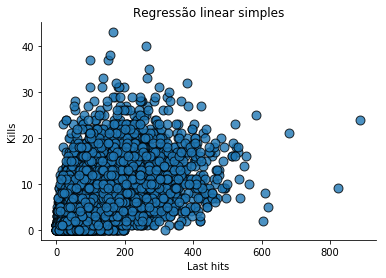

In [5]:
x = df_killsLastHits["Last hits"].values
y = df_killsLastHits["Kills"].values

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Last hits')
plt.ylabel('Kills')
plt.title('Regressão linear simples')
despine()

Nesta etapa da regressão, iremos tirar a média dos valores dos Last Hits e visualizar como o modelo se encontra até essa etapa.


In [6]:
copy = df_killsLastHits[['Last hits', 'Kills']].copy()
model = copy.groupby('Last hits').mean()

Text(0.5, 1.0, 'Regressão linear simples')

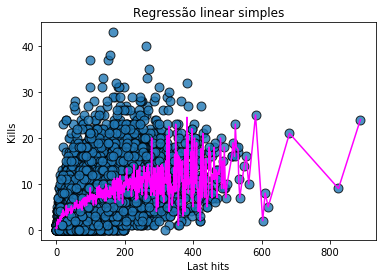

In [7]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Last hits')
plt.ylabel('Kills')
plt.title('Regressão linear simples')

Nesta etapa, iremos z-normalizar os dados e visualizar como o modelo se modifica.

In [8]:
znormed = df_killsLastHits[['Last hits', 'Kills']].copy()
znormed = (znormed - znormed.mean()) / znormed.std(ddof=1)
znormed.head()

,Last hits,Kills
0,-0.715401,0.240182
1,-1.234706,-1.070247
2,-0.704352,-1.070247
3,-1.201559,-0.883042
4,-0.560715,-1.070247


In [9]:
x = znormed['Last hits'].copy()
y = znormed['Kills'].copy()

In [10]:
znormed['Last hits'] = znormed['Last hits'].round()
model = znormed.groupby('Last hits').mean()

Text(0.5, 1.0, 'Regressão linear simples')

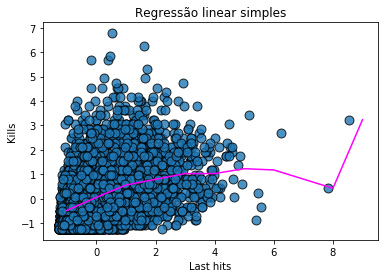

In [11]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Last hits')
plt.ylabel('Kills')
plt.title('Regressão linear simples')

 De forma simples, queremos uma reta possível de explicar tando a dispersão em x quanto em y. Tal reta deve se aproximar da média dos dois valores quando vistos em janelas (estilo o NN acima). Em particular, você supõe que existem constantes $\alpha$ (alfa) e $\beta$ (beta) tais que:
$$\hat{y}_i = \beta x_i + \alpha + \epsilon_i$$

Idealmente, vamos conseguir capturar o valor médio de $y_i$ para grupos de valores próximos em $x_i$. $\epsilon_i$ é um termo de erro (esperançosamente pequeno) que representa o fato de que existem outros fatores não explicados por este modelo simples.

Como escolhemos alfa e beta? Bem, qualquer escolha de alfa e beta nos dá uma saída prevista para cada entrada $x_i$. Como sabemos a saída real $y_i$, podemos calcular o erro de cada par. Computa o valor $\epsilon_i$.


In [12]:
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

-> Daqui para frente é que começa mesmo a regressão: (eu acho)

Somamos os erros quadrados:

In [17]:
def sum_of_squared_errors(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

Tá igual no notebook do professor, vou alterar por um texto meu ainda:

Sem passar pela matemática exata, vamos pensar em por que isso pode ser uma solução razoável. A escolha do alfa simplesmente diz que quando vemos o valor médio da variável independente $x$, predizemos o valor médio da variável dependente $y$.

A escolha de beta significa que quando o valor de entrada aumenta pelo desvio padrão de $x$, a previsão de $y$ aumenta pela correlação entre $x$ e $y$ multiplicada pelo desvio padrão de $y$ (correlationxy * np.std(y)). No caso em que $x$ e $y$ estão perfeitamente correlacionados, um aumento de um desvio padrão em $x$ resulta em um aumento de um desvio padrão de $y$ na predição. Quando eles são perfeitamente anti-correlacionados, o aumento em $x$ resulta em uma diminuição no valor da previsão. E quando a correlação é zero, o beta é zero, o que significa que as alterações em $x$ não afetam a previsão.

In [18]:
from scipy import stats as ss

def least_squares_fit(x, y):
    correlationxy = ss.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

Cálculo do alpha e do beta

Text(0.5, 1.0, 'Regressão linear simples')

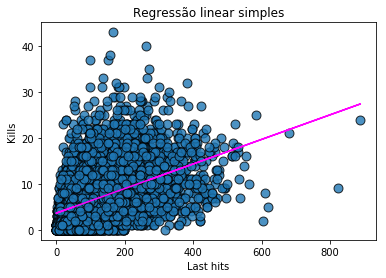

In [19]:
x = df_killsLastHits['Last hits'].values
y = df_killsLastHits['Kills'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Last hits')
plt.ylabel('Kills')
plt.title('Regressão linear simples')

In [20]:
alpha, beta

(3.615111159687398, 0.02679871905788478)

In [21]:
def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [22]:
r_squared(alpha, beta, x, y)

0.20616254039281512

Ainda preciso ver como interpretar esses números, mas o interessante é que a nossa correlação foi maior que a do notebook do professor (0,10).

In [23]:
r_squared(alpha, beta, x, y) ** 0.5

0.4540512530461898

In [24]:
ss.pearsonr(x, y)[0]

0.4540512530461898

Igual ao slide do professor, ainda vou pensar em como escrever isso de outra forma

-> Bootstrap na Regressão

Lembre-se que nossa regressão foi realizada em uma amostra. Portanto, qualque estatística que temos vêm com erros. Os coeficientes da nossa regressão: $\alpha$ e $\beta$ têm erros. Além da correlação $r$ e do $R^2$. Como saber a variablidade de tais estimativas? Bootstrap. O código abaixo faz um Bootstrap de: $\alpha$, $\beta$ e $R^2$.


In [25]:
def bootstrap_regression(df, n=10000, size=None):
    if size is None:
        size = len(df)
    
    alphas = np.zeros(n)
    betas = np.zeros(n)
    rs = np.zeros(n)

    for i in range(n):
        sample = df.sample(size, replace=True)
        x = sample['Last hits'].values
        y = sample['Kills'].values
        alpha, beta = least_squares_fit(x, y)
    
        alphas[i] = alpha
        betas[i] = beta
        rs[i] = ss.pearsonr(x, y)[0] ** 2
    return alphas, betas, rs

In [26]:
alphas, betas, rs = bootstrap_regression(df_killsLastHits)

3.614398362931103
3.453405845951834 3.7749569967612393


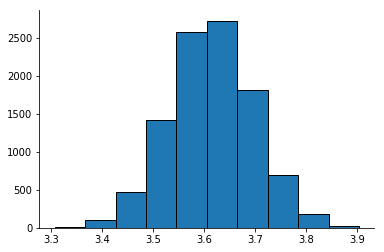

In [27]:
plt.hist(alphas, edgecolor='k')
lower = np.percentile(alphas, 2.5)
upper = np.percentile(alphas, 97.5)
despine()
print(alphas.mean())
print(lower, upper)

0.02680535128284274
0.025416772371275827 0.027978695170740878


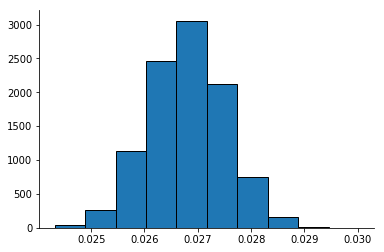

In [28]:
plt.hist(betas, edgecolor='k')
lower = np.percentile(betas, 2.5)
upper = np.percentile(betas, 95)
despine()
print(betas.mean())
print(lower, upper)

0.20624290449724822
0.18909995518763556 0.22358046630814582


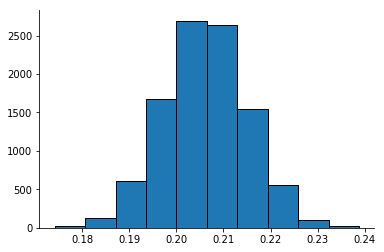

In [29]:
plt.hist(rs, edgecolor='k')
lower = np.percentile(rs, 2.5)
upper = np.percentile(rs, 97.5)
despine()
print(rs.mean())
print(lower, upper)

-> Aprendizado/classificação:

https://pt.wikipedia.org/wiki/Aprendizado_de_m%C3%A1quina

Aprendizado supervisionado: São apresentadas ao computador exemplos de entradas e saídas desejadas, fornecidas por um "professor". O objetivo é aprender uma regra geral que mapeia as entradas para as saídas.

Em classificação, entradas são divididas em duas ou mais classes, e o aprendiz deve produzir um modelo que vincula entradas não vistas a uma ou mais dessas classes (classificação multi-etiquetada). Isso é tipicamente abordado de forma supervisionada. A filtragem de spam é um exemplo de classificação, em que as entradas são as mensagens de emails (ou outros) e as classes são "spam" ou "não spam".

http://www.cienciaedados.com/conceitos-fundamentais-de-machine-learning/

É o termo usado sempre que o programa é “treinado” sobre um conjunto de dados pré-definido. Baseado no treinamento com os dados pré-definidos, o programa pode tomar decisões precisas quando recebe novos dados. Exemplo: Pode-se usar um conjunto de dados de recursos humanos para treinamento da Machine Learning, que tenha tweets marcados como positivos, negativos e neutros e assim treinar um classificador de análise de sentimento.

A classificação é uma sub-categoria de aprendizagem supervisionada. Classificação é o processo de tomar algum tipo de entrada e atribuir um rótulo a ela. Sistemas de classificação são usados ​​geralmente quando as previsões são de natureza distinta, ou seja, um simples “sim ou não”. Exemplo: Mapeamento de uma imagem de uma pessoa e classificação como masculino ou feminino.

KNN

Na situação geral, temos alguns pontos de dados e temos um conjunto de rótulos correspondente. Os rótulos podem ser True e False, indicando se cada entrada satisfaz alguma condição como "é spam?" Ou "é venenoso?" Ou "seria agradável assistir". Ou podem ser categorias, como a classificação indicativa de filmes (G, PG, PG-13, R, NC-17). Ou eles poderiam ser os nomes dos candidatos presidenciais. Ou poderiam ser linguagens de programação favoritas.

Tentar prever quais os itens que os jogadores terminarão a partida
Observando como atributo primário, tipos de ataque, level

-> KNN tridimensional: Kills x Deaths x Assists

A ideia aqui foi plotar um gráfico tridimensional de eixos Kills, Deaths e Assists dos jogadores de todas as partidas. Com o gráfico plotado, a ideia é através dos vizinhos mais próximos, tentar prever se o jogador saiu vitorioso ou não de uma partida.

In [30]:
df_prediction = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', kills 'Kills', assists 'Assists', deaths 'Deaths', player_slot 'Team', radiant_win 'Resultado'
FROM match AS M
INNER JOIN(
    SELECT *
    FROM player AS P
    INNER JOIN(
        SELECT hero_id id, localized_name hero_name
        FROM heroes
    ) AS H
    ON P.hero_id = H.id
) AS K
ON M.match_id = K.player_match_id
''', conn)

df_prediction

,Hero Name,Kills,Assists,Deaths,Team,Resultado
0,Ember Spirit,8,4,0,0,1
1,Necrophos,1,7,1,1,1
2,Wraith King,1,4,2,2,1
3,Vengeful Spirit,2,2,2,3,1
4,Slardar,1,1,1,4,1
5,Lion,1,3,5,128,1
6,Templar Assassin,1,0,4,129,1
7,Spectre,1,3,1,130,1
8,Shadow Shaman,1,3,3,131,1
9,Omniknight,2,0,1,132,1


Text(0.5, 0.92, 'KDA em três dimensões')

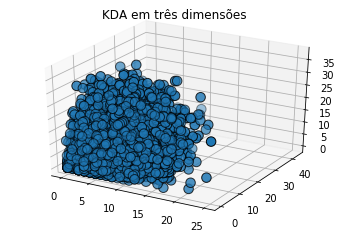

In [31]:
xpre = df_prediction["Deaths"].values
ypre = df_prediction["Kills"].values
zpre = df_prediction["Assists"].values

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpre, ypre, zpre, s=90, edgecolors='k')
plt.title("KDA em três dimensões")

-> KNN: Número de jogadores x KDA

KDA = $(kills + assists)/MAX(1,deaths).$

A ideia é calcular o KDA de todos os jogadores de todos os jogos, e a partir do gráfico bidimensional gerado entre KDA e o índice de cada jogador, utilizar o algoritmo de vizinho mais próximo (KNN) para tentar prever se o jogador com determinado KDA saiu vencedor em sua partida.

In [32]:
df_kda_pre = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', kills Kills, assists Assists, deaths Deaths, (CAST(kills AS float)+CAST(assists AS float))/CAST(MAX(1, deaths) AS float) "KDA Ratio"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
) AS H
ON P.hero_id = H.id
''', conn)

df_kda_pre

,Hero Name,Kills,Assists,Deaths,KDA Ratio
0,Ember Spirit,8,4,0,12.000000
1,Necrophos,1,7,1,8.000000
2,Wraith King,1,4,2,2.500000
3,Vengeful Spirit,2,2,2,2.000000
4,Slardar,1,1,1,2.000000
5,Lion,1,3,5,0.800000
6,Templar Assassin,1,0,4,0.250000
7,Spectre,1,3,1,4.000000
8,Shadow Shaman,1,3,3,1.333333
9,Omniknight,2,0,1,2.000000


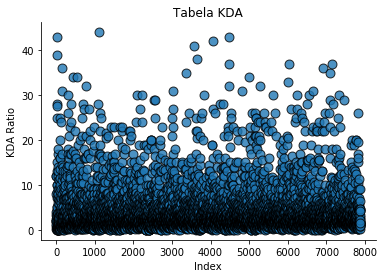

In [33]:
x_kda_pre = df_kda_pre.index
y_kda_pre = df_kda_pre["KDA Ratio"].values

plt.scatter(x_kda_pre, y_kda_pre, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Index')
plt.ylabel('KDA Ratio')
plt.title('Tabela KDA')
despine()

Parei aqui...